In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [83]:
# cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
df = pd.read_csv('data/women_shoes.csv')
df.shape

(18001, 47)

In [0]:
df.sample()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,websiteids,weight
2891,AVpfVnW91cnluZ0-i6C1,NaN,TOMS,"Women's Casual Shoes,Shoes,Clothing,Women's Shoes",Black,NaN,2017-01-27 01:23:33,2017-01-27 01:23:33,"[{""dateSeen"":[""2017-01-27T01:23:33Z""],""sourceU...",NaN,8.895560e+11,"[{""key"":""Sport"",""value"":[""Lifestyle""]},{""key"":...",NaN,https://i5.walmartimages.com/asr/afefee53-29d7...,NaN,"0889556105014,889556105014,toms/tomwlunatalace...",Toms,TOMW-LUNATALACEUPS-BLACK90.9M,"[{""dateSeen"":[""2017-01-27T01:23:33Z""],""name"":""...",Toms Women's Lunata Lace-up Casual Shoe,76.9,76.9,NaN,NaN,NaN,NaN,USD,2017-01-27T01:23:33Z,2017-01-24T00:00:00Z,NaN,True,NaN,REDUCED USD 42.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Toms-Women-s-Lunata...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Toms-Women-s-Lunata...,8.895560e+11,NaN,NaN


In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

80.91430476084132

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

67.18691922456821

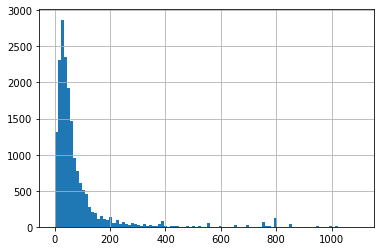

In [0]:
df['prices_amountmin'].hist(bins=100)

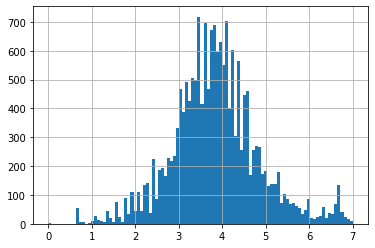

In [0]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

56.284606410754954

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

56.31106186683235

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
feats = ['brand_cat']
run_model(feats)

(-51.7790224568183, 0.6800384408022533)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
feats = ['manufacturer_cat']
run_model(feats)

(-67.71896474272188, 3.887282618857807)

In [0]:
feats = ['brand_cat', 'manufacturer_cat']
run_model(feats)

(-51.454016868307804, 0.8875568782863367)